In [57]:
%matplotlib inline 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

Set properties for run

In [2]:
#Remember to set these to correct values 
replicatesnum = 12
numsamples = 7
rox = False

Add Echo reading file below

In [4]:
#Re-index so that content is the indexer and drop unnecessary columns
#Load dataframe for incubation

# df = pd.read_excel(r"./LoD_echos/2022_02_25_Brendan_LOD_optimisation.xlsx", index_col=2)
# df = pd.read_excel(r"LoD_echos/2022_03_11_Brendan_LOD_optimisation.xlsx", index_col=2) #Best LOD right now 
# df = pd.read_excel(r"LoD_echos/2022_03_30_Brendan_LOD_optimisation.xlsx", index_col=2) #To see rough value of LOD
df = pd.read_excel(r"LoD_echos/2022_05_23_Cas12_guide1_LOD.xlsx", index_col = 2)

df = df.drop(columns = ['Well'])
df = df.set_index('Content')
# df1 = df.iloc[:, : 59]

if rox: df2 = df.iloc[:,59:-1] #Include if there's ROX
else: df1 = df

Set the concentration values for the echo samples

In [5]:
# concs = np.array([0,234.9,469.9,704.8,939.7,1174.6,1409.6,1644.5,1879.4,2114.4,2349.3,2584.2,2819.2,3054.1,3289,3523.9])/10
# concs = [0,3.538608749,7.077217498,10.61582625,14.154435,17.69304375,21.23165249,24.77026124,28.30886999,31.84747874,35.38608749,38.92469624,42.46330499,46.00191374,49.54052249,53.07913124] #For best LOD so far
# concs = [0.0000852,0.000852,0.00852,0.0852,0.852,8.52,85.2,852,0]
concs = [0,5,10,25,50,75,100]

In [6]:
def cleanData(trip,stdwidth = 2,replicatesnum = replicatesnum):
    i = 0
    take_data = []
    trip_meantest = trip.mean(axis=0)
    trip_stdtest = trip.std(axis=0)
    while i < replicatesnum:
        try:
            if (trip_meantest[-1] + stdwidth * trip_stdtest[-1] < trip.iloc[i][-1]) or (trip_meantest[-1] - stdwidth * trip_stdtest[-1] > trip.iloc[i][-1]):
                take_data.append(False)
            else:
                take_data.append(True)
        except:
            if (trip_meantest[-1] + stdwidth * trip_stdtest[-1] < trip[i][-1]) or (trip_meantest[-1] - stdwidth * trip_stdtest[-1] > trip[i][-1]):
                take_data.append(False)
            else:
                take_data.append(True)
        i += 1
    try: return trip.iloc[take_data]
    except: return trip[take_data]

In [7]:
#Make variables for time and separate into triplicates
Time = df1.loc['Time [h]']*60

Trip_mean = []
Trip_std = []
Trip_mean_norm = []
Trip_std_norm = []
for i in range(numsamples):
    sample = 'Sample X' + str(i+1)
    Trip = df1.loc[sample]
    
    Trip_mean_single = cleanData(Trip).mean(axis=0)
    Trip_std_single = cleanData(Trip).std(axis=0)
    
    Trip_mean.append(Trip_mean_single)
    Trip_std.append(Trip_std_single)
    if rox:
        Trip_norm = np.array(df1.loc[sample])/np.array(df2.loc[sample])
        Trip_mean_norm_single = cleanData(Trip_norm).mean(axis=0)
        Trip_std_norm_single = cleanData(Trip_norm).std(axis=0)
        Trip_mean_norm.append(Trip_mean_norm_single)
        Trip_std_norm.append(Trip_std_norm_single)

#### Comment out or add if more/less samples 

Trip1 = df1.loc['Sample X1']
Trip1 = cleanData(Trip1)
Trip1_mean = Trip1.mean(axis=0)
Trip1_std = Trip1.std(axis=0)

Trip2 = df1.loc['Sample X2']
Trip2 = cleanData(Trip2)
Trip2_mean = Trip2.mean(axis=0)
Trip2_std = Trip2.std(axis=0)

Trip3 = df1.loc['Sample X3']
Trip3 = cleanData(Trip3)
Trip3_mean = Trip3.mean(axis=0)
Trip3_std = Trip3.std(axis=0)

Trip4 = df1.loc['Sample X4']
Trip4 = cleanData(Trip4)
Trip4_mean = Trip4.mean(axis=0)
Trip4_std = Trip4.std(axis=0)

Trip5 = df1.loc['Sample X5']
Trip5 = cleanData(Trip5)
Trip5_mean = Trip5.mean(axis=0)
Trip5_std = Trip5.std(axis=0)

Trip6 = df1.loc['Sample X6']
Trip6 = cleanData(Trip6)
Trip6_mean = Trip6.mean(axis=0)
Trip6_std = Trip6.std(axis=0)

Trip7 = df1.loc['Sample X7']
Trip7 = cleanData(Trip7)
Trip7_mean = Trip7.mean(axis=0)
Trip7_std = Trip7.std(axis=0)

# Trip8 = df1.loc['Sample X8']
# Trip8 = cleanData(Trip8)
# Trip8_mean = Trip8.mean(axis=0)
# Trip8_std = Trip8.std(axis=0)

# Trip9 = df1.loc['Sample X9']
# Trip9 = cleanData(Trip9)
# Trip9_mean = Trip9.mean(axis=0)
# Trip9_std = Trip9.std(axis=0)

# Trip10 = df1.loc['Sample X10']
# Trip10 = cleanData(Trip10)
# Trip10_mean = Trip10.mean(axis=0)
# Trip10_std = Trip10.std(axis=0)

# Trip11 = df1.loc['Sample X11']
# Trip11 = cleanData(Trip11)
# Trip11_mean = Trip11.mean(axis=0)
# Trip11_std = Trip11.std(axis=0)

# Trip12 = df1.loc['Sample X12']
# Trip12 = cleanData(Trip12)
# Trip12_mean = Trip12.mean(axis=0)
# Trip12_std = Trip12.std(axis=0)

# Trip13 = df1.loc['Sample X13']
# Trip13 = cleanData(Trip13)
# Trip13_mean = Trip13.mean(axis=0)
# Trip13_std = Trip13.std(axis=0)

# Trip14 = df1.loc['Sample X14']
# Trip14 = cleanData(Trip14)
# Trip14_mean = Trip14.mean(axis=0)
# Trip14_std = Trip14.std(axis=0)

# Trip15 = df1.loc['Sample X15']
# Trip15 = cleanData(Trip15)
# Trip15_mean = Trip15.mean(axis=0)
# Trip15_std = Trip15.std(axis=0)

# Trip16 = df1.loc['Sample X16']
# Trip16 = cleanData(Trip16)
# Trip16_mean = Trip16.mean(axis=0)
# Trip16_std = Trip16.std(axis=0)

In [8]:
#Plot all data 
#### Comment out or add if more/less samples 
fig = go.Figure(go.Scatter(
    ))
fig.add_trace(go.Scatter(x=Time, y=Trip1_mean, error_y = dict(type='data', array=Trip1_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[0])))
fig.add_trace(go.Scatter(x=Time, y=Trip2_mean, error_y = dict(type='data', array=Trip2_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[1])))
fig.add_trace(go.Scatter(x=Time, y=Trip3_mean, error_y = dict(type='data', array=Trip3_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[2]), marker = dict(color = 'brown')))
fig.add_trace(go.Scatter(x=Time, y=Trip4_mean, error_y = dict(type='data', array=Trip4_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[3])))
fig.add_trace(go.Scatter(x=Time, y=Trip5_mean, error_y = dict(type='data', array=Trip5_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[4])))
fig.add_trace(go.Scatter(x=Time, y=Trip6_mean, error_y = dict(type='data', array=Trip6_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[5])))
fig.add_trace(go.Scatter(x=Time, y=Trip7_mean, error_y = dict(type='data', array=Trip7_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[6])))
# fig.add_trace(go.Scatter(x=Time, y=Trip8_mean, error_y = dict(type='data', array=Trip8_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[7])))
# fig.add_trace(go.Scatter(x=Time, y=Trip9_mean, error_y = dict(type='data', array=Trip9_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[8])))

# fig.add_trace(go.Scatter(x=Time, y=Trip10_mean, error_y = dict(type='data', array=Trip10_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[9])))
# fig.add_trace(go.Scatter(x=Time, y=Trip11_mean, error_y = dict(type='data', array=Trip11_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[10])))
# fig.add_trace(go.Scatter(x=Time, y=Trip12_mean, error_y = dict(type='data', array=Trip12_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[11])))
# fig.add_trace(go.Scatter(x=Time, y=Trip13_mean, error_y = dict(type='data', array=Trip13_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[12])))
# fig.add_trace(go.Scatter(x=Time, y=Trip14_mean, error_y = dict(type='data', array=Trip14_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[13])))
# fig.add_trace(go.Scatter(x=Time, y=Trip15_mean, error_y = dict(type='data', array=Trip15_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[14])))
# fig.add_trace(go.Scatter(x=Time, y=Trip16_mean, error_y = dict(type='data', array=Trip16_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[15])))

#Change title 
fig.update_layout(title="FQ5 probe lba Cas 12a Collateral Cleavage assay (gRNA 1 and ssDNA Target 1) 22/5/22", xaxis_title="Time (min)", yaxis_title="Fluorescence (AU)", legend_title="Reaction description", plot_bgcolor = 'white')


fig.show() 

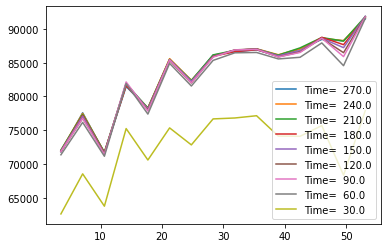

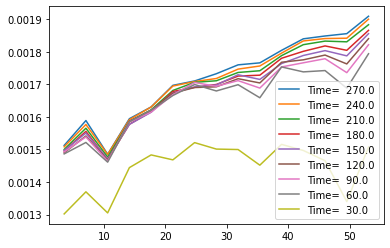

In [8]:
#Plot through time 
for i in range(1,10):
    i *= 6
    plt.plot(concs[1:],np.array(Trip_mean)[1:, -i], label = 'Time=  {}'.format(Time[-i]))
plt.legend()
plt.show()

if rox:
    for i in range(1,10):
        i *= 6
        plt.plot(concs[1:],np.array(Trip_mean_norm)[1:, -i], label = 'Time=  {}'.format(Time[-i]))
    plt.legend()
    plt.show()

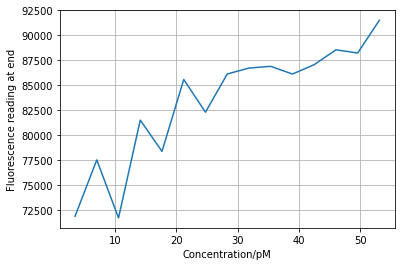

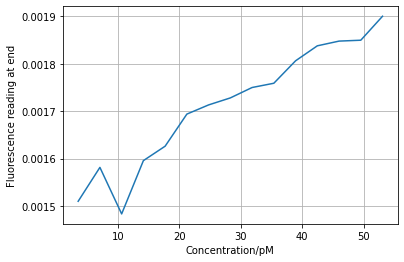

In [9]:
plt.plot(concs[1:],np.array(Trip_mean)[1:,50])
plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at end');plt.grid();plt.show()

if rox:
    plt.plot(concs[1:],np.array(Trip_mean_norm)[1:,50])
    plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at end');plt.grid();plt.show()

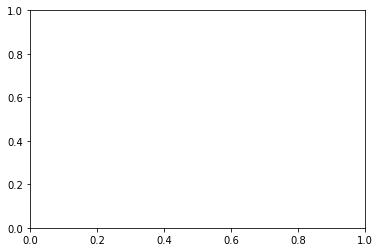

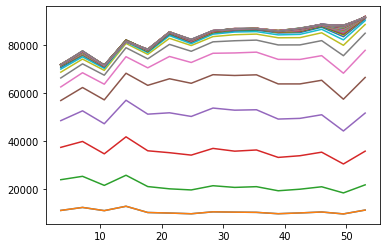

In [10]:
import matplotlib.animation as ani
from IPython.display import HTML
def graphfunc(i):
    ax.cla()
    x = concs[1:]
    y = np.array(Trip_mean)[1:,i]
    error = np.array(Trip_std)[1:,i]
    ax.errorbar(x,y,yerr=error)
    plt.plot(x,y)
    # ax.title('Time = {}'.format(Time[i]))
fig,ax = plt.subplots()
animator = ani.FuncAnimation(fig, graphfunc, frames=57, interval = 200)
# plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at end');plt.grid()
plt.show()
HTML(animator.to_html5_video())

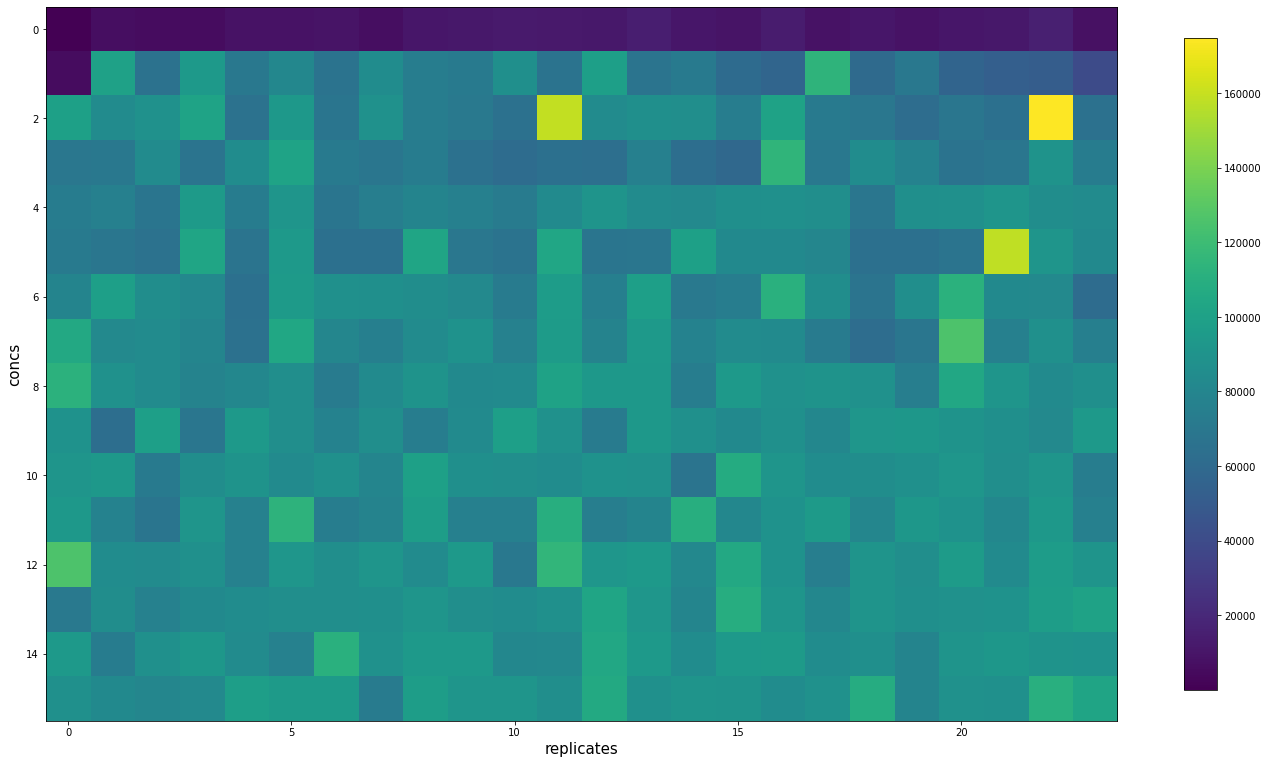

In [11]:
total_samples = []
samples = []
for i in range(numsamples*replicatesnum):
    samples.append(df1.iloc[i][-1])
    if len(samples) == replicatesnum:
        total_samples.append(samples)
        samples = []
plt.figure(figsize=(replicatesnum, numsamples))
plt.imshow(total_samples)
cbar = plt.colorbar(shrink = 0.75)

plt.xlabel('replicates', fontsize = 15);plt.ylabel('concs', fontsize = 15)
plt.show()

Find LoD

In [12]:
### Brute force to find best LoD and best concentration ranges / time
minimum = np.inf
for j in range(len(concs[1:])-6): #Condition that must be at least 6 concentration values 
    for k in range(59):
        X = np.array(concs[1+j:]).reshape(-1,1)
        y = np.array(Trip_mean)[1:, k][j:].reshape(-1,1)
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression().fit(X, y)
        grad = reg.coef_
        grad
        std = np.std(reg.predict(X) - y)
        std
        limitD = 3 * std / grad
        if limitD < minimum and limitD > 0: #LoD has to be greater than 0
            minimum = limitD
            concbound = j
            timepoint = k
minimum, concbound, timepoint


(array([[13.33655894]]), 8, 54)

In [13]:
if rox:
    minimum = np.inf
    for j in range(len(concs[1:])-6):
        for k in range(59):
            X = np.array(concs[1+j:]).reshape(-1,1)
            y = np.array(Trip_mean_norm)[1:, k][j:].reshape(-1,1)
            from sklearn.linear_model import LinearRegression
            reg = LinearRegression().fit(X, y)
            grad = reg.coef_
            grad
            std = np.std(reg.predict(X) - y)
            std
            limitD = 3 * std / grad
            if limitD < minimum and limitD > 0:
                minimum = limitD
                concbound_norm = j
                timepoint_norm = k
    print(minimum, concbound_norm, timepoint_norm)


[[4.17601769]] 6 54


In [14]:
if rox:
    X = np.array(concs[1+concbound_norm:]).reshape(-1,1)
    y = np.array(Trip_mean_norm)[1:, timepoint_norm][concbound_norm:].reshape(-1,1)
else:
    X = np.array(concs[1+concbound:]).reshape(-1,1)
    y = np.array(Trip_mean)[1:, timepoint][concbound:].reshape(-1,1)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
grad = reg.coef_
grad
std = np.std(reg.predict(X) - y)
std
limitD = 3 * std / grad

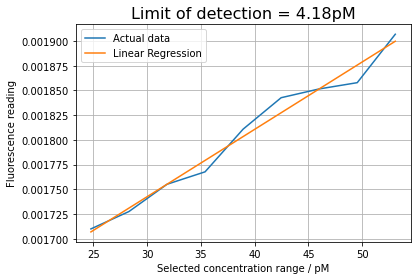

In [15]:
plt.plot(X,y, label = 'Actual data')
plt.plot(X,reg.predict(X),label = 'Linear Regression')
plt.title('Limit of detection = {}pM'.format(round(limitD.ravel()[0],2)), fontsize = 16)
plt.xlabel('Selected concentration range / pM');plt.ylabel('Fluorescence reading');plt.grid();plt.legend()
plt.show()

Replicates analysis 

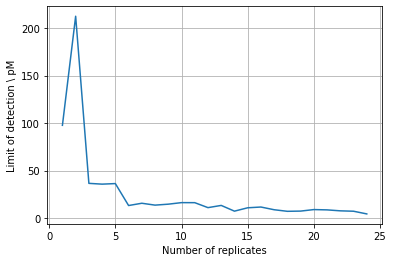

[array([[97.60036331]]),
 array([[212.44080568]]),
 array([[36.48966203]]),
 array([[35.66214224]]),
 array([[36.25155295]]),
 array([[13.14970294]]),
 array([[15.54070916]]),
 array([[13.56951647]]),
 array([[14.57383047]]),
 array([[16.19901201]]),
 array([[16.15111349]]),
 array([[10.93007359]]),
 array([[13.25582277]]),
 array([[7.22216539]]),
 array([[10.76529361]]),
 array([[11.56213842]]),
 array([[8.71320215]]),
 array([[7.05538781]]),
 array([[7.28530711]]),
 array([[8.88235543]]),
 array([[8.55915145]]),
 array([[7.55875346]]),
 array([[7.13964846]]),
 array([[4.31305506]])]

In [16]:
limitDs = []
for replicate in range(1,replicatesnum+1):
    ### Comment out / add if more/less samples 
    Trip1 = df1.loc['Sample X1'][:replicate]
    Trip1_mean = Trip1.mean(axis=0)
    Trip1_std = Trip1.std(axis=0)

    Trip2 = df1.loc['Sample X2'][:replicate]
    Trip2_mean = Trip2.mean(axis=0)
    Trip2_std = Trip2.std(axis=0)

    Trip3 = df1.loc['Sample X3'][:replicate]
    Trip3_mean = Trip3.mean(axis=0)
    Trip3_std = Trip3.std(axis=0)

    Trip4 = df1.loc['Sample X4'][:replicate]
    Trip4_mean = Trip4.mean(axis=0)
    Trip4_std = Trip4.std(axis=0)

    Trip5 = df1.loc['Sample X5'][:replicate]
    Trip5_mean = Trip5[0:2].mean(axis=0)
    Trip5_std = Trip5[0:2].std(axis=0)

    Trip6 = df1.loc['Sample X6'][:replicate]
    Trip6_mean = Trip6.mean(axis=0)
    Trip6_std = Trip6.std(axis=0)

    Trip7 = df1.loc['Sample X7'][:replicate]
    Trip7_mean = Trip7.mean(axis=0)
    Trip7_std = Trip7.std(axis=0)

    Trip8 = df1.loc['Sample X8'][:replicate]
    Trip8_mean = Trip8.mean(axis=0)
    Trip8_std = Trip8.std(axis=0)

    Trip9 = df1.loc['Sample X9'][:replicate]
    Trip9_mean = Trip9.mean(axis=0)
    Trip9_std = Trip9.std(axis=0)

    Trip10 = df1.loc['Sample X10'][:replicate]
    Trip10_mean = Trip10.mean(axis=0)
    Trip10_std = Trip10.std(axis=0)

    Trip11 = df1.loc['Sample X11'][:replicate]
    Trip11_mean = Trip11.mean(axis=0)
    Trip11_std = Trip11.std(axis=0)

    Trip12 = df1.loc['Sample X12'][:replicate]
    Trip12_mean = Trip12.mean(axis=0)
    Trip12_std = Trip12.std(axis=0)

    Trip13 = df1.loc['Sample X13'][:replicate]
    Trip13_mean = Trip13.mean(axis=0)
    Trip13_std = Trip13.std(axis=0)

    Trip14 = df1.loc['Sample X14'][:replicate]
    Trip14_mean = Trip14.mean(axis=0)
    Trip14_std = Trip14.std(axis=0)

    Trip15 = df1.loc['Sample X15'][:replicate]
    Trip15_mean = Trip15.mean(axis=0)
    Trip15_std = Trip15.std(axis=0)

    Trip16 = df1.loc['Sample X16'][:replicate]
    Trip16_mean = Trip16.mean(axis=0)
    Trip16_std = Trip16.std(axis=0)

    Trip_mean = [Trip1_mean,Trip2_mean,Trip3_mean,Trip4_mean,Trip5_mean,Trip6_mean,Trip7_mean,Trip8_mean,Trip9_mean,Trip10_mean,Trip11_mean,Trip12_mean,Trip13_mean,Trip14_mean,Trip15_mean,Trip16_mean]

    X = np.array(concs[1+concbound:]).reshape(-1,1)
    y = np.array(Trip_mean)[1:, timepoint][concbound:].reshape(-1,1)
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(X, y)
    grad = reg.coef_
    std = np.std(reg.predict(X) - y)
    limitDs.append(3 * std / grad)
plt.plot(np.arange(1,25),np.array(limitDs).ravel())
plt.xlabel('Number of replicates');plt.ylabel('Limit of detection \ pM');plt.grid()
plt.show()
limitDs

Seems best linear region to use if around 1nM, so [500,600,700,800,900,1000,1100,1200,1300,1400]pM

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exponential(t, a, b, c):
    return a * (1-np.exp(-b * t)) + c
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)
t = Time 

In [12]:
def calcKValues(data, func, maxLimit = 20000, normalise = True, plot = False):
  y = data
  plt.plot(y)
  if func == 'exponential':
    popt, pcov = curve_fit(exponential, t.astype('float64'), y.astype('float64'), p0 = [np.max(y), 0.01, np.min(y)], maxfev=20000)
    return -popt[1]

  if func == 'sigmoid':
    popt, pcov = curve_fit(sigmoid, t.astype('float64'), y.astype('float64'), p0 = [np.max(y), np.median(t), 0.01, np.min(y)], maxfev=20000)
    return popt[2]

In [13]:
def calcKValues(data, func, normalise = True):

  y = data

  if func == 'exponential':
    popt, pcov = curve_fit(exponential, t.astype('float64'), y.astype('float64'), p0 = [np.max(y), 0.06, np.min(y)], maxfev=20000)
    peak = popt[0]+popt[2]
    if not normalise:
      return popt[1]

  if func == 'sigmoid':
    popt, pcov = curve_fit(sigmoid, t.astype('float64'), y.astype('float64'), p0 = [np.max(y), np.median(t), 0.01, np.min(y)], maxfev=20000)
    peak = popt[0]+popt[-1]
    if not normalise:
      return popt[2]

  if normalise:
    y = y/peak

    if func == 'exponential':
      popt, pcov = curve_fit(exponential, t.astype('float64'), y.astype('float64'), p0 = [np.max(y), 0.06, np.min(y)], maxfev=20000)
      return popt[1]

    if func == 'sigmoid':
      popt, pcov = curve_fit(sigmoid, t.astype('float64'), y.astype('float64'), p0 = [np.max(y), np.median(t), 0.01, np.min(y)], maxfev=20000)
      return popt[2]
    plt.plot(y)
   

In [14]:
ks = [calcKValues(mean, 'exponential', normalise = False) for mean in Trip_mean[0:]]


In [15]:
ks

[3.87874748970703e-06,
 4.690622655641358e-06,
 4.466199888589618e-06,
 4.801071135764195e-06,
 4.6096901128817755e-06,
 4.42970911882214e-06,
 4.275787198766642e-06]

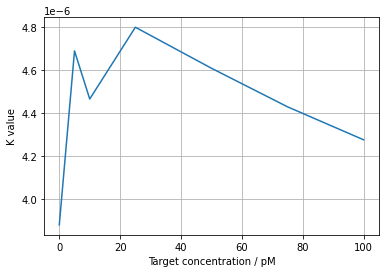

In [16]:
plt.plot(concs[:],ks[:][::])
plt.grid()
# plt.xscale('log')
plt.ylabel('K value');plt.xlabel('Target concentration / pM')
plt.show()

In [17]:
concs

[0, 5, 10, 25, 50, 75, 100]

(array([[5.48781755]]), 0.00155027784068007)

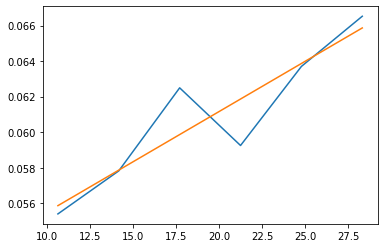

In [23]:
from sklearn.linear_model import LinearRegression
X = np.array(concs[1+2:9]).reshape(-1,1)
y = np.array(ks[::-1])[2:8].reshape(-1,1)
reg = LinearRegression().fit(X,y)
grad = reg.coef_
std = np.std(reg.predict(X) - y)
limitD = 2 * std / grad
plt.plot(X,y)
plt.plot(X,reg.predict(X))
limitD, std

In [18]:
minimum = np.inf
for j in range(len(concs[1:])): #Condition that must be at least 6 concentration values 
    for k in range(len(concs[1:])):
        if k - j >= 4:
            X = np.array(concs[1+j:k+1]).reshape(-1,1)
            y = np.array(ks[::-1])[j:k].reshape(-1,1)
            from sklearn.linear_model import LinearRegression
            reg = LinearRegression().fit(X, y)
            grad = reg.coef_
            grad
            std = np.std(reg.predict(X) - y)
            std
            limitD = 2 * std / grad
            if limitD < minimum and limitD > 0: #LoD has to be greater than 0
                minimum = limitD
                conclower = j
                concupper = k
minimum, conclower, concupper

(array([[8.64763587]]), 0, 4)

(array([[8.64763587]]), 4.7142115905756563e-08)

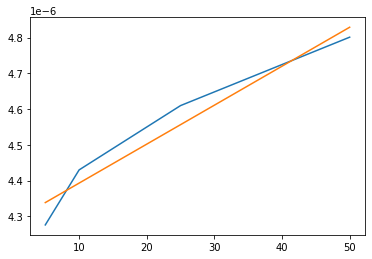

In [19]:
from sklearn.linear_model import LinearRegression
X = np.array(concs[1+conclower:concupper+1]).reshape(-1,1)
y = np.array(ks[::-1])[conclower:concupper].reshape(-1,1)
reg = LinearRegression().fit(X,y)
grad = reg.coef_
std = np.std(reg.predict(X) - y)
limitD = 2 * std / grad
plt.plot(X,y)
plt.plot(X,reg.predict(X))
limitD, std

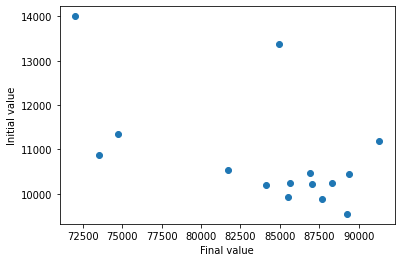

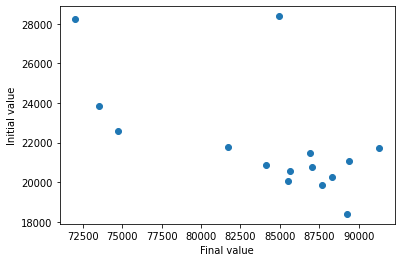

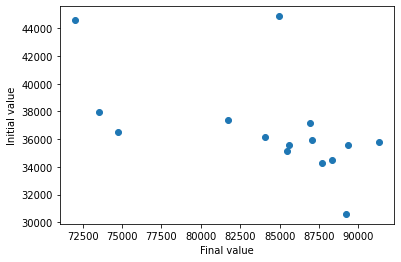

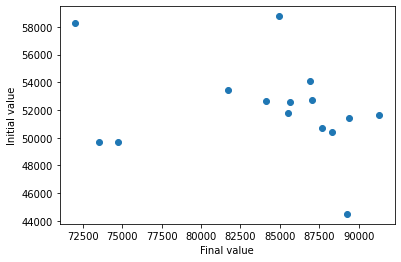

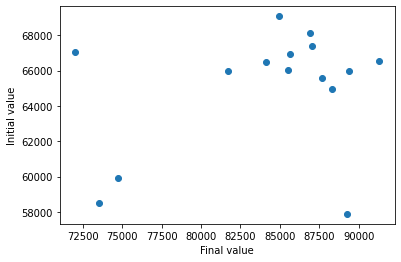

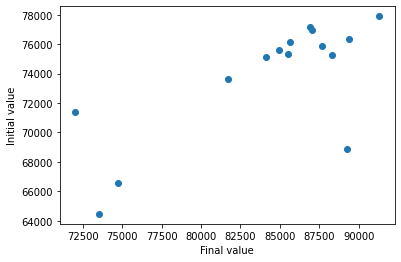

In [43]:
x= np.array(Trip_mean)[1:, -1]
y= np.array(Trip_mean)[1:, 0]
plt.xlabel('Final value');plt.ylabel('Initial value')
plt.scatter(x,y);plt.show()

x= np.array(Trip_mean)[1:, -1]
y= np.array(Trip_mean)[1:, 1]
plt.xlabel('Final value');plt.ylabel('Initial value')
plt.scatter(x,y);plt.show()

x= np.array(Trip_mean)[1:, -1]
y= np.array(Trip_mean)[1:, 2]
plt.xlabel('Final value');plt.ylabel('Initial value')
plt.scatter(x,y);plt.show()

x= np.array(Trip_mean)[1:, -1]
y= np.array(Trip_mean)[1:, 3]
plt.xlabel('Final value');plt.ylabel('Initial value')
plt.scatter(x,y);plt.show()

x= np.array(Trip_mean)[1:, -1]
y= np.array(Trip_mean)[1:, 4]
plt.xlabel('Final value');plt.ylabel('Initial value')
plt.scatter(x,y);plt.show()

x= np.array(Trip_mean)[1:, -1]
y= np.array(Trip_mean)[1:, 5]
plt.xlabel('Final value');plt.ylabel('Initial value')
plt.scatter(x,y);plt.show()

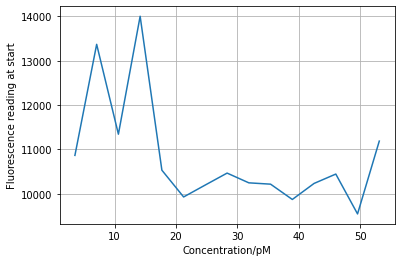

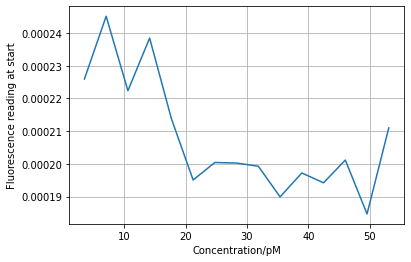

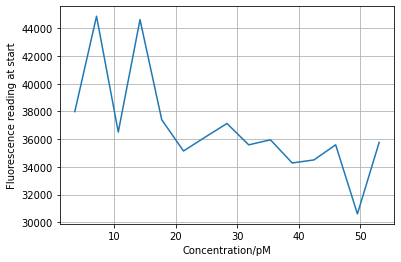

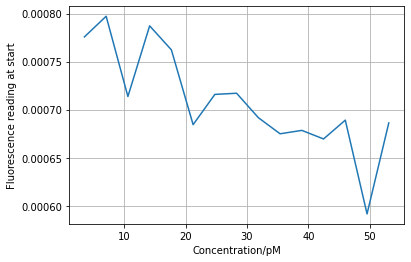

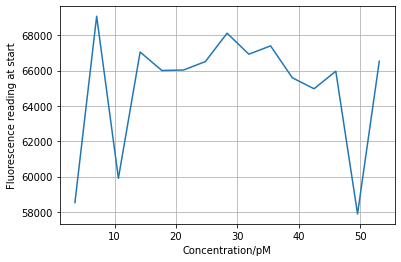

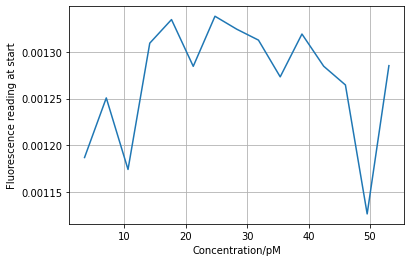

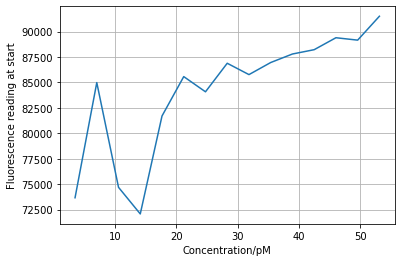

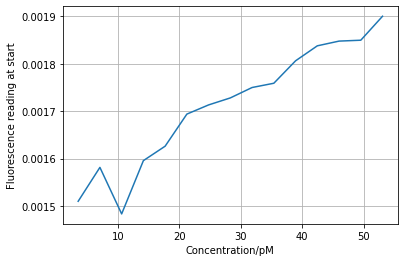

In [48]:
plt.plot(concs[1:],np.array(Trip_mean)[1:,0])
plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at start');plt.grid();plt.show()

plt.plot(concs[1:],np.array(Trip_mean_norm)[1:,0])
plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at start');plt.grid();plt.show()

plt.plot(concs[1:],np.array(Trip_mean)[1:,2])
plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at start');plt.grid();plt.show()

plt.plot(concs[1:],np.array(Trip_mean_norm)[1:,2])
plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at start');plt.grid();plt.show()

plt.plot(concs[1:],np.array(Trip_mean)[1:,4])
plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at start');plt.grid();plt.show()

plt.plot(concs[1:],np.array(Trip_mean_norm)[1:,4])
plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at start');plt.grid();plt.show()

plt.plot(concs[1:],np.array(Trip_mean)[1:,50])
plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at start');plt.grid();plt.show()

plt.plot(concs[1:],np.array(Trip_mean_norm)[1:,50])
plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at start');plt.grid();plt.show()


In [20]:
def calcGradient(y, normalise = True):
    popt, pcov = curve_fit(sigmoid, t.astype('float64'), y.astype('float64'), p0 = [np.max(y), np.median(t), 0.01, np.min(y)], maxfev=20000)
    peak = popt[0]+popt[-1]
    

    if normalise:
        y = y/peak
        y = np.array(y[:7]).reshape(-1,1)
        X = np.array(t[:7]).reshape(-1,1)
        reg = LinearRegression().fit(X,y)
        grad = reg.coef_
        return grad 
    else:
        y = np.array(y[:7]).reshape(-1,1)
        X = np.array(t[:7]).reshape(-1,1)
        reg = LinearRegression().fit(X,y)
        grad = reg.coef_
        # plt.plot(X,reg.predict(X))
        # plt.plot(X,y)
        # plt.show()
        return grad 
ks = [calcGradient(mean, normalise = False) for mean in Trip_mean]

/Users/brendanhuo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

overflow encountered in exp

/Users/brendanhuo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

overflow encountered in exp

/Users/brendanhuo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

overflow encountered in exp

/Users/brendanhuo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

overflow encountered in exp

/Users/brendanhuo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

overflow encountered in exp

/Users/brendanhuo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

overflow encountered in exp

/Users/brendanhuo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

overflow encountered in exp



In [21]:
ks = np.array(ks).ravel().reshape(-1,1)

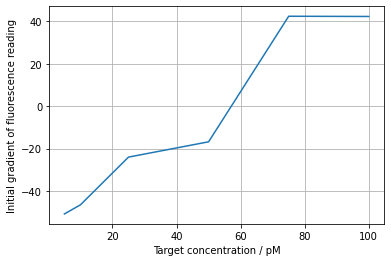

In [22]:
plt.plot(concs[1:],ks[1:])
plt.grid()
plt.xlabel('Target concentration / pM');plt.ylabel('Initial gradient of fluorescence reading')
plt.show()

In [23]:
minimum = np.inf
for j in range(len(concs[1:])): #Condition that must be at least 6 concentration values 
    for k in range(len(concs[1:])):
        if k - j >= 4:
            X = np.array(concs[1+j:k+1]).reshape(-1,1)
            y = np.array(ks)[j:k].reshape(-1,1)
            from sklearn.linear_model import LinearRegression
            reg = LinearRegression().fit(X, y)
            grad = reg.coef_
            grad
            std = np.std(reg.predict(X) - y)
            std
            limitD = 2 * std / grad
            if limitD < minimum and limitD > 0: #LoD has to be greater than 0
                minimum = limitD
                conclower = j
                concupper = k
minimum, conclower, concupper

(array([[7.96599418]]), 0, 4)

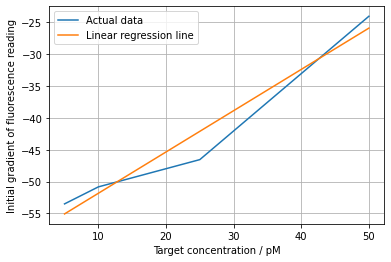

(array([[7.96599418]]), 2.582172643516172)

In [24]:
from sklearn.linear_model import LinearRegression
X = np.array(concs[1+conclower:concupper+1]).reshape(-1,1)
y = np.array(ks)[conclower:concupper].reshape(-1,1)
reg = LinearRegression().fit(X,y)
grad = reg.coef_
std = np.std(reg.predict(X) - y)
limitD = 2 * std / grad
plt.plot(X,y, label = 'Actual data')
plt.plot(X,reg.predict(X), label = 'Linear regression line')
plt.grid()
plt.xlabel('Target concentration / pM');plt.ylabel('Initial gradient of fluorescence reading')
plt.legend()
plt.show()
limitD, std

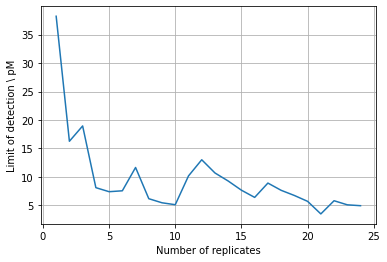

In [212]:
limitDs = []
for replicate in range(1,replicatesnum+1):
    ### Comment out / add if more/less samples 
    Trip1 = df1.loc['Sample X1'][:replicate]
    Trip1_mean = Trip1.mean(axis=0)
    Trip1_std = Trip1.std(axis=0)

    Trip2 = df1.loc['Sample X2'][:replicate]
    Trip2_mean = Trip2.mean(axis=0)
    Trip2_std = Trip2.std(axis=0)

    Trip3 = df1.loc['Sample X3'][:replicate]
    Trip3_mean = Trip3.mean(axis=0)
    Trip3_std = Trip3.std(axis=0)

    Trip4 = df1.loc['Sample X4'][:replicate]
    Trip4_mean = Trip4.mean(axis=0)
    Trip4_std = Trip4.std(axis=0)

    Trip5 = df1.loc['Sample X5'][:replicate]
    Trip5_mean = Trip5[0:2].mean(axis=0)
    Trip5_std = Trip5[0:2].std(axis=0)

    Trip6 = df1.loc['Sample X6'][:replicate]
    Trip6_mean = Trip6.mean(axis=0)
    Trip6_std = Trip6.std(axis=0)

    Trip7 = df1.loc['Sample X7'][:replicate]
    Trip7_mean = Trip7.mean(axis=0)
    Trip7_std = Trip7.std(axis=0)

    Trip8 = df1.loc['Sample X8'][:replicate]
    Trip8_mean = Trip8.mean(axis=0)
    Trip8_std = Trip8.std(axis=0)

    Trip9 = df1.loc['Sample X9'][:replicate]
    Trip9_mean = Trip9.mean(axis=0)
    Trip9_std = Trip9.std(axis=0)

    Trip10 = df1.loc['Sample X10'][:replicate]
    Trip10_mean = Trip10.mean(axis=0)
    Trip10_std = Trip10.std(axis=0)

    Trip11 = df1.loc['Sample X11'][:replicate]
    Trip11_mean = Trip11.mean(axis=0)
    Trip11_std = Trip11.std(axis=0)

    Trip12 = df1.loc['Sample X12'][:replicate]
    Trip12_mean = Trip12.mean(axis=0)
    Trip12_std = Trip12.std(axis=0)

    Trip13 = df1.loc['Sample X13'][:replicate]
    Trip13_mean = Trip13.mean(axis=0)
    Trip13_std = Trip13.std(axis=0)

    Trip14 = df1.loc['Sample X14'][:replicate]
    Trip14_mean = Trip14.mean(axis=0)
    Trip14_std = Trip14.std(axis=0)

    Trip15 = df1.loc['Sample X15'][:replicate]
    Trip15_mean = Trip15.mean(axis=0)
    Trip15_std = Trip15.std(axis=0)

    Trip16 = df1.loc['Sample X16'][:replicate]
    Trip16_mean = Trip16.mean(axis=0)
    Trip16_std = Trip16.std(axis=0)

    Trip_mean = [Trip1_mean,Trip2_mean,Trip3_mean,Trip4_mean,Trip5_mean,Trip6_mean,Trip7_mean,Trip8_mean,Trip9_mean,Trip10_mean,Trip11_mean,Trip12_mean,Trip13_mean,Trip14_mean,Trip15_mean,Trip16_mean]

    ks = [calcGradient(mean, normalise = False) for mean in Trip_mean]
    
    X = np.array(concs[1+conclower:concupper+1]).reshape(-1,1)
    y = np.array(ks)[conclower:concupper].reshape(-1,1)
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(X, y)
    grad = reg.coef_
    std = np.std(reg.predict(X) - y)
    limitDs.append(2 * std / grad)
plt.plot(np.arange(1,25),np.array(limitDs).ravel()-5)
plt.xlabel('Number of replicates');plt.ylabel('Limit of detection \ pM');plt.grid()
plt.show()

[ 2.57031441e-03  1.25199933e+01  7.94900596e-02 -7.68703184e-04]


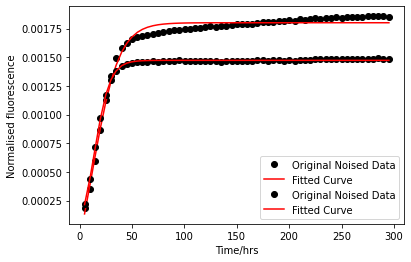

[ 1.61180277e-03  1.41803640e+01  1.35276975e-01 -1.38375527e-04]


In [153]:
y = Trip_mean_norm[14]#/max(ss_fam_data.iloc[117])
popt, pcov = curve_fit(sigmoid, t.astype('float64'), y.astype('float64'), p0 = [np.max(y),np.min(y),0.06,np.min(y)], method = 'dogbox', maxfev=20000)
plt.figure()
plt.plot(t, y, 'ko', label="Original Noised Data")
plt.plot(t, sigmoid(t, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.grid();plt.ylabel('Normalised fluorescence');plt.xlabel('Time/hrs')
print(popt)
y = Trip_mean_norm[3]#/max(ss_fam_data.iloc[117])
popt, pcov = curve_fit(sigmoid, t.astype('float64'), y.astype('float64'), p0 = [np.max(y),np.min(y),0.06,np.min(y)], method = 'dogbox', maxfev=20000)
plt.plot(t, y, 'ko', label="Original Noised Data")
plt.plot(t, sigmoid(t, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.grid();plt.ylabel('Normalised fluorescence');plt.xlabel('Time/hrs')
plt.show()
print(popt)